# Notebook 03 — Feature Extraction

Extract engineered features from raw XPQRS signals for use with traditional ML classifiers.

**Feature categories:**
| Domain | Count | Examples |
|---|---|---|
| Time-domain | 14 | RMS, Crest Factor, Kurtosis, Zero-Crossing Rate |
| Frequency (FFT) | 10 | Fundamental magnitude, THD, Spectral Centroid |
| Wavelet (DWT) | 12 | Sub-band energies, std, entropy (db4, 3 levels) |
| **Total** | **36** | |

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('../src'))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data_loader import load_xpqrs, load_pq_disturbances_as_dataframe
from feature_extractor import (
    extract_all_features, extract_features_batch,
    TIME_FEATURE_NAMES, FFT_FEATURE_NAMES, WAVELET_FEATURE_NAMES,
    ALL_FEATURE_NAMES, get_feature_domain
)

sns.set_theme(style='whitegrid')
%matplotlib inline

XPQRS_DIR = '../dataset/XPQRS/'
PQ_DIR    = '../dataset/PQ Disturbances Dataset/'

## 1. Feature Extraction — XPQRS Dataset

Extract 36 features from each of 17,000 raw waveform signals.

In [2]:
signals, labels = load_xpqrs(XPQRS_DIR)
print(f'Signals: {signals.shape}, Labels: {labels.shape}')

Signals: (17000, 100), Labels: (17000,)


In [3]:
# Demo: extract features from one signal
demo_features = extract_all_features(signals[0])
print(f'Features per signal: {len(demo_features)}')
for name, val in demo_features.items():
    print(f'  {name:25s} = {val:.6f}')

Features per signal: 36
  mean                      = -0.002614
  std                       = 0.738635
  rms                       = 0.738640
  peak                      = 1.074972
  crest_factor              = 1.455339
  skewness                  = -0.005663
  kurtosis                  = -1.500977
  zero_crossing_rate        = 0.020000
  peak_to_peak              = 2.124393
  form_factor               = 1.110434
  energy                    = 54.558908
  waveform_length           = 4.176872
  iqr                       = 1.464792
  entropy                   = 4.122174
  fundamental_mag           = 0.522144
  harmonic_3rd              = 0.004954
  harmonic_5th              = 0.002742
  harmonic_7th              = 0.001925
  thd                       = 0.024019
  spectral_centroid         = 111.373525
  spectral_spread           = 284.789125
  spectral_energy           = 0.272798
  dominant_freq             = 50.000000
  hf_energy_ratio           = 0.000058
  cA3_energy                = 9

In [4]:
%%time
# Extract features from ALL signals (takes ~1-2 minutes)
xpqrs_features_df = extract_features_batch(signals, labels, verbose=True)

  Extracted features for 1000/17000 signals
  Extracted features for 2000/17000 signals
  Extracted features for 3000/17000 signals
  Extracted features for 4000/17000 signals
  Extracted features for 5000/17000 signals
  Extracted features for 6000/17000 signals
  Extracted features for 7000/17000 signals
  Extracted features for 8000/17000 signals
  Extracted features for 9000/17000 signals
  Extracted features for 10000/17000 signals
  Extracted features for 11000/17000 signals
  Extracted features for 12000/17000 signals
  Extracted features for 13000/17000 signals
  Extracted features for 14000/17000 signals
  Extracted features for 15000/17000 signals
  Extracted features for 16000/17000 signals
  Extracted features for 17000/17000 signals
  Done. Feature matrix shape: (17000, 37)
CPU times: user 7.58 s, sys: 146 ms, total: 7.73 s
Wall time: 7.71 s


In [5]:
print(f'Feature matrix shape: {xpqrs_features_df.shape}')
print(f'Columns: {list(xpqrs_features_df.columns)}')
xpqrs_features_df.head()

Feature matrix shape: (17000, 37)
Columns: ['mean', 'std', 'rms', 'peak', 'crest_factor', 'skewness', 'kurtosis', 'zero_crossing_rate', 'peak_to_peak', 'form_factor', 'energy', 'waveform_length', 'iqr', 'entropy', 'fundamental_mag', 'harmonic_3rd', 'harmonic_5th', 'harmonic_7th', 'thd', 'spectral_centroid', 'spectral_spread', 'spectral_energy', 'dominant_freq', 'hf_energy_ratio', 'cA3_energy', 'cA3_std', 'cA3_entropy', 'cD3_energy', 'cD3_std', 'cD3_entropy', 'cD2_energy', 'cD2_std', 'cD2_entropy', 'cD1_energy', 'cD1_std', 'cD1_entropy', 'label']


,mean,std,rms,peak,crest_factor,skewness,kurtosis,zero_crossing_rate,peak_to_peak,form_factor,...,cD3_energy,cD3_std,cD3_entropy,cD2_energy,cD2_std,cD2_entropy,cD1_energy,cD1_std,cD1_entropy,label
0,-0.002614,0.738635,0.738640,1.074972,1.455339,-0.005663,-1.500977,0.02,2.124393,1.110434,...,0.001628,0.009350,0.013254,0.000052,0.001301,0.000596,4.734238e-07,0.000095,0.000008,Flicker
1,0.006143,0.732558,0.732584,1.050957,1.434590,0.016187,-1.492296,0.02,2.076019,1.112413,...,0.135482,0.085467,0.464053,0.010494,0.018647,0.064772,3.111196e-05,0.000766,0.000371,Flicker
2,0.015602,0.757387,0.757548,1.096788,1.447813,0.021772,-1.497226,0.02,2.143877,1.111548,...,0.191917,0.101814,0.598055,0.017629,0.024166,0.099725,5.584440e-05,0.001026,0.000634,Flicker
3,-0.001127,0.736827,0.736828,1.045437,1.418835,-0.001678,-1.495868,0.02,2.087328,1.111811,...,0.179805,0.098510,0.563858,0.016482,0.023361,0.094215,5.174284e-05,0.000988,0.000591,Flicker
4,-0.007599,0.754049,0.754087,1.080356,1.432667,-0.010789,-1.493636,0.02,2.151813,1.111677,...,0.023767,0.035765,0.123466,0.001069,0.005959,0.009035,2.562996e-06,0.000220,0.000037,Flicker


In [6]:
# Check for NaN or Inf
feature_cols = [c for c in xpqrs_features_df.columns if c != 'label']
print(f'NaN count: {xpqrs_features_df[feature_cols].isna().sum().sum()}')
print(f'Inf count: {np.isinf(xpqrs_features_df[feature_cols].values).sum()}')

# Replace any Inf with NaN, then fill with 0
xpqrs_features_df[feature_cols] = xpqrs_features_df[feature_cols].replace([np.inf, -np.inf], np.nan).fillna(0)

NaN count: 0
Inf count: 0


## 2. Feature Analysis

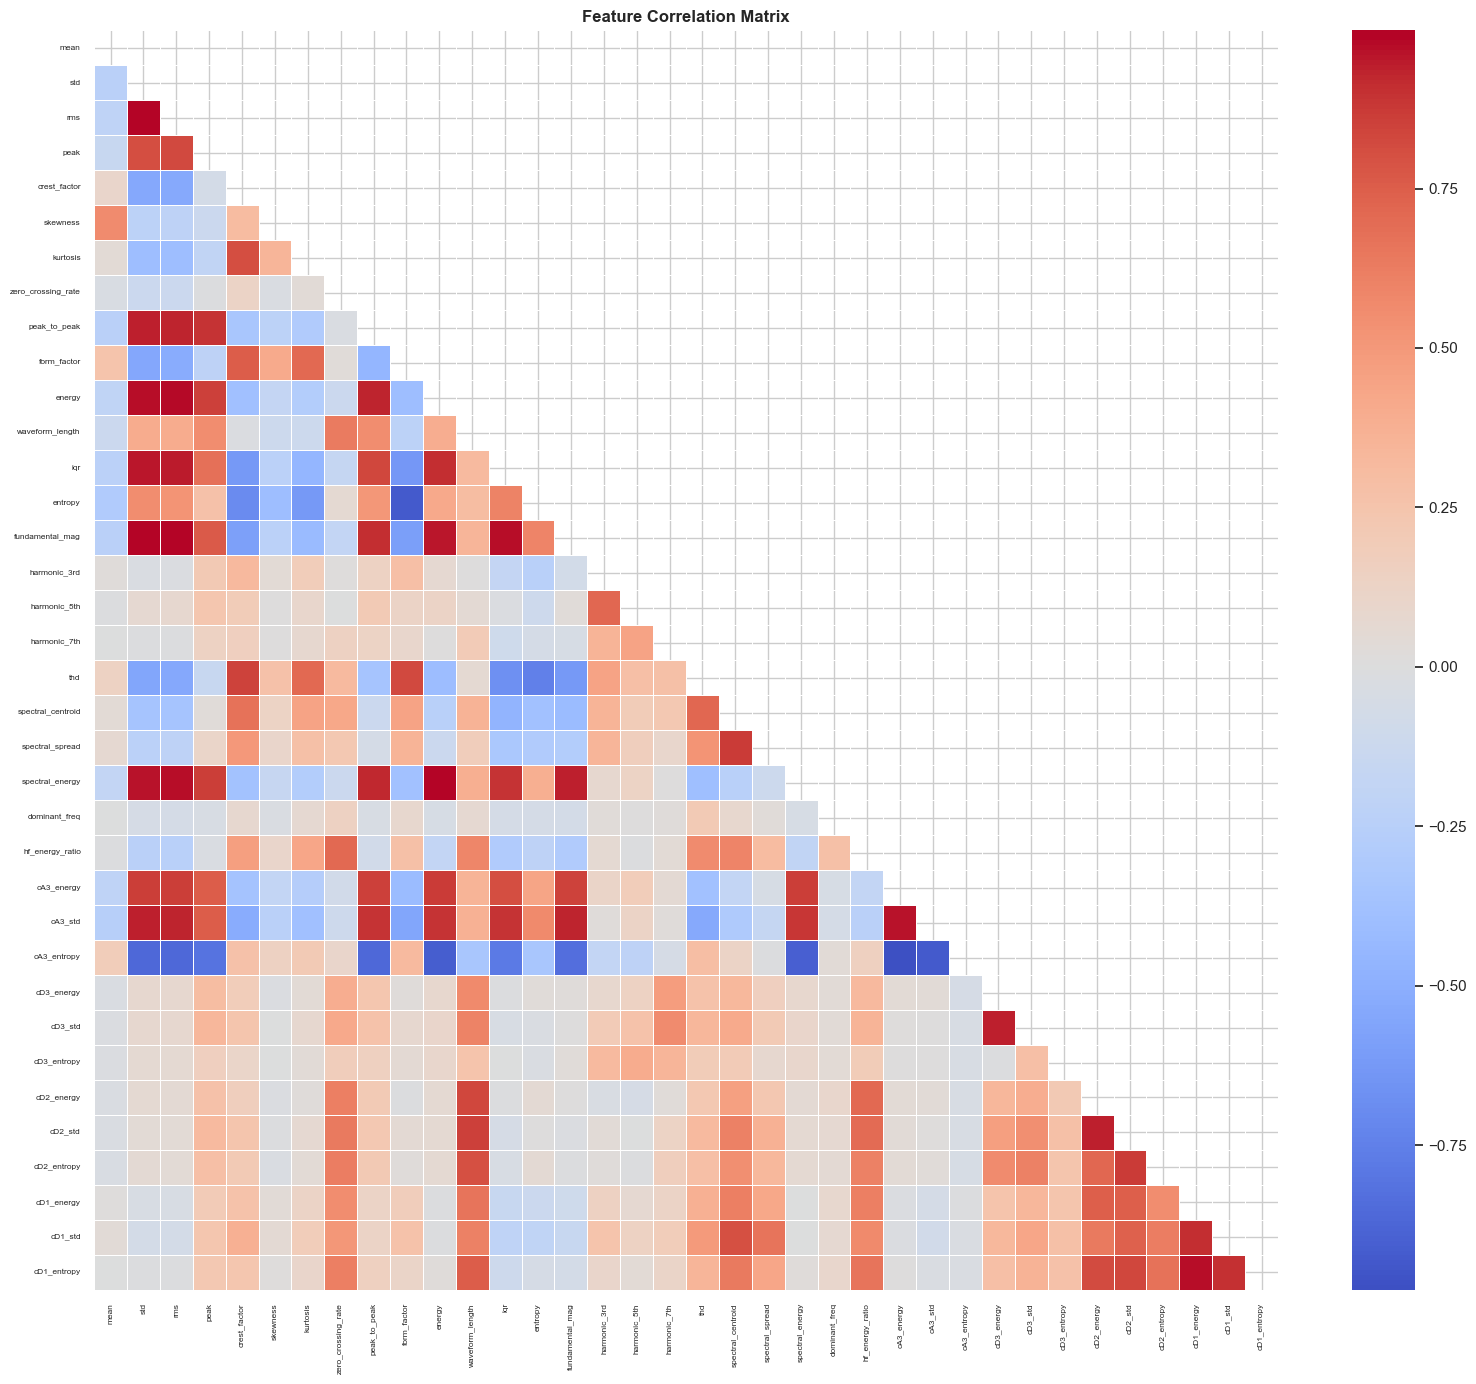

In [7]:
# Correlation matrix
corr = xpqrs_features_df[feature_cols].corr()

fig, ax = plt.subplots(figsize=(16, 14))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0, ax=ax,
            xticklabels=True, yticklabels=True, linewidths=0.5)
ax.set_title('Feature Correlation Matrix', fontweight='bold')
ax.tick_params(labelsize=6)
plt.tight_layout()
fig.savefig('../results/figures/feature_correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

In [8]:
# Find highly correlated feature pairs (> 0.95)
high_corr_pairs = []
for i in range(len(feature_cols)):
    for j in range(i+1, len(feature_cols)):
        if abs(corr.iloc[i, j]) > 0.95:
            high_corr_pairs.append((feature_cols[i], feature_cols[j], corr.iloc[i, j]))

print(f'Highly correlated pairs (|r| > 0.95): {len(high_corr_pairs)}')
for f1, f2, r in high_corr_pairs:
    print(f'  {f1:25s} <-> {f2:25s}  r = {r:.3f}')

Highly correlated pairs (|r| > 0.95): 15
  std                       <-> rms                        r = 0.996
  std                       <-> energy                     r = 0.971
  std                       <-> iqr                        r = 0.957
  std                       <-> fundamental_mag            r = 0.994
  std                       <-> spectral_energy            r = 0.961
  rms                       <-> energy                     r = 0.977
  rms                       <-> iqr                        r = 0.951
  rms                       <-> fundamental_mag            r = 0.988
  rms                       <-> spectral_energy            r = 0.972
  energy                    <-> fundamental_mag            r = 0.953
  energy                    <-> spectral_energy            r = 0.998
  iqr                       <-> fundamental_mag            r = 0.973
  cA3_energy                <-> cA3_std                    r = 0.966
  cA3_energy                <-> cA3_entropy                r =

/var/folders/n7/5wy3r6wn5833mtqwn743ynx00000gn/T/ipykernel_44517/1014806529.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data.values, labels=valid_feats, vert=True)
/var/folders/n7/5wy3r6wn5833mtqwn743ynx00000gn/T/ipykernel_44517/1014806529.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data.values, labels=valid_feats, vert=True)
/var/folders/n7/5wy3r6wn5833mtqwn743ynx00000gn/T/ipykernel_44517/1014806529.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data.values, labels=valid_feats, vert=True)


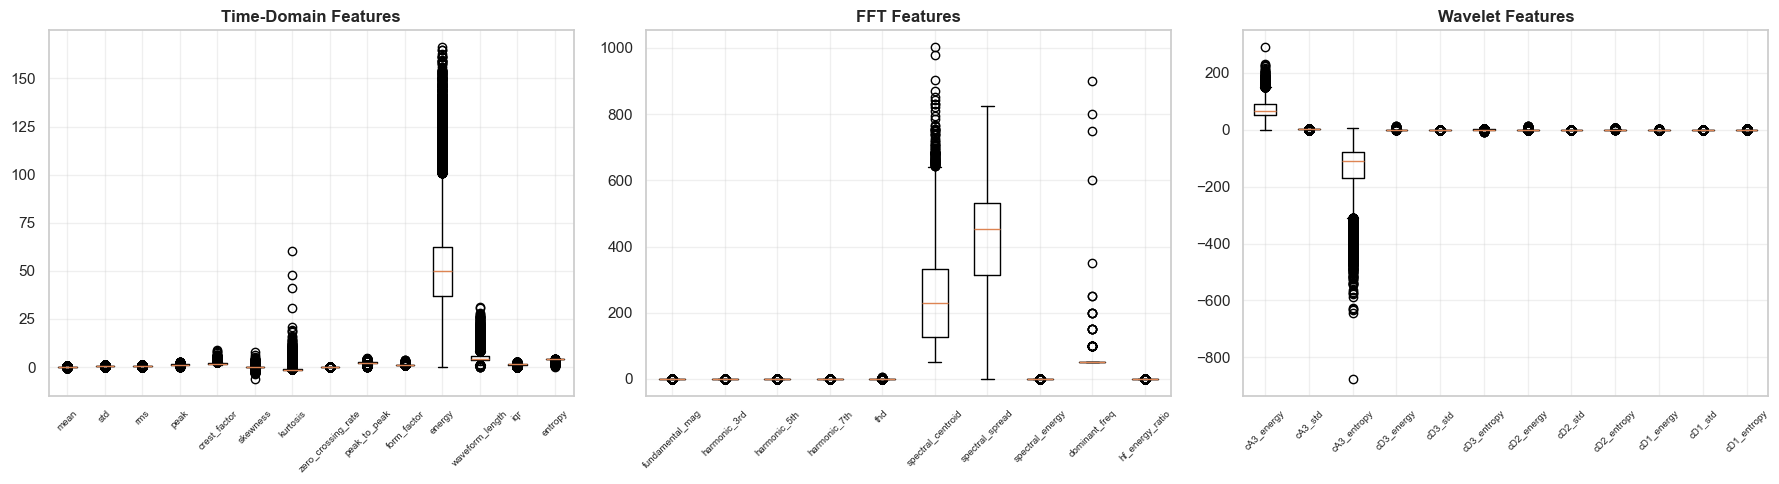

In [9]:
# Feature distribution by domain
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

domain_features = {
    'Time-Domain': TIME_FEATURE_NAMES,
    'FFT': FFT_FEATURE_NAMES,
    'Wavelet': WAVELET_FEATURE_NAMES
}

for ax, (domain, feat_names) in zip(axes, domain_features.items()):
    valid_feats = [f for f in feat_names if f in feature_cols]
    data = xpqrs_features_df[valid_feats]
    ax.boxplot(data.values, labels=valid_feats, vert=True)
    ax.set_title(f'{domain} Features', fontweight='bold')
    ax.tick_params(axis='x', rotation=45, labelsize=7)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
fig.savefig('../results/figures/feature_distributions_by_domain.png', dpi=150, bbox_inches='tight')
plt.show()

## 3. Quick Feature Importance Preview (Random Forest)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
y = le.fit_transform(xpqrs_features_df['label'])
X = xpqrs_features_df[feature_cols].values

# Quick RF for feature importance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_scaled, y)

importances = rf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

print('Top 15 features by importance:')
for i in range(15):
    idx = sorted_idx[i]
    domain = get_feature_domain(feature_cols[idx])
    print(f'  {i+1:2d}. {feature_cols[idx]:25s} ({domain:7s}) = {importances[idx]:.4f}')

Top 15 features by importance:
   1. peak                      (time   ) = 0.0685
   2. harmonic_5th              (fft    ) = 0.0645
   3. hf_energy_ratio           (fft    ) = 0.0506
   4. waveform_length           (time   ) = 0.0498
   5. fundamental_mag           (fft    ) = 0.0489
   6. std                       (time   ) = 0.0464
   7. thd                       (fft    ) = 0.0459
   8. spectral_spread           (fft    ) = 0.0373
   9. rms                       (time   ) = 0.0331
  10. spectral_energy           (fft    ) = 0.0324
  11. harmonic_3rd              (fft    ) = 0.0320
  12. entropy                   (time   ) = 0.0310
  13. energy                    (time   ) = 0.0301
  14. cD2_entropy               (wavelet) = 0.0285
  15. cD1_entropy               (wavelet) = 0.0278


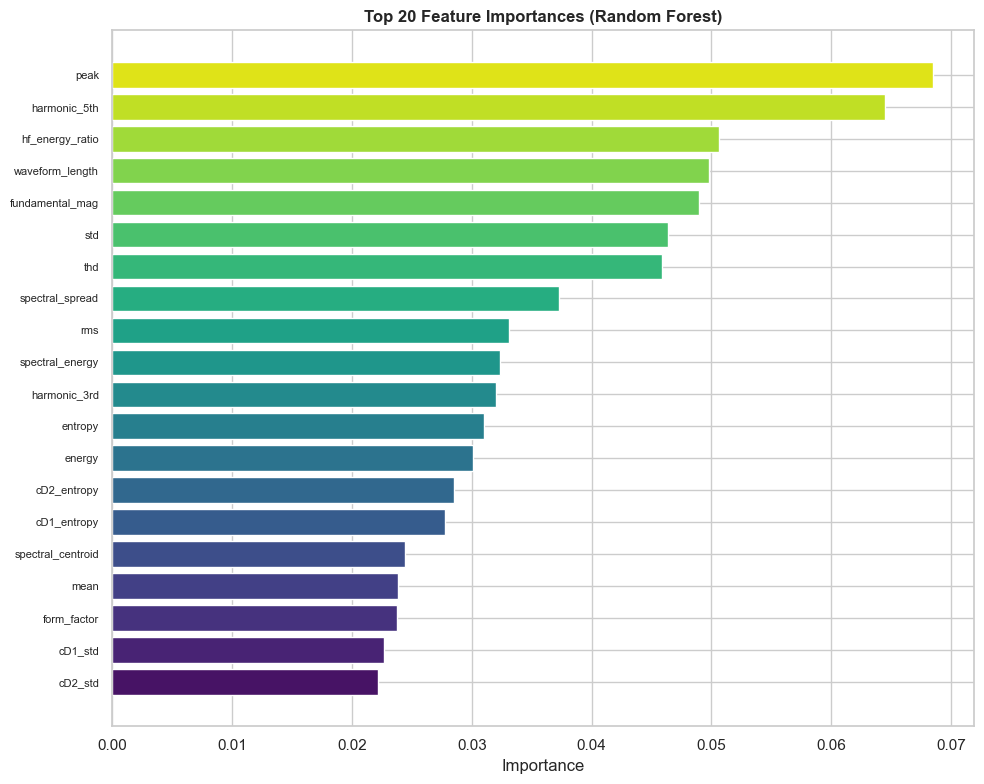

In [11]:
from visualization import plot_feature_importance

fig = plot_feature_importance(importances, feature_cols, top_n=20,
                              title='Top 20 Feature Importances (Random Forest)')
fig.savefig('../results/figures/feature_importance_rf.png', dpi=150, bbox_inches='tight')
plt.show()

## 4. Dimensionality Reduction Visualization

Explained variance: PC1=0.335, PC2=0.246
Total: 0.581


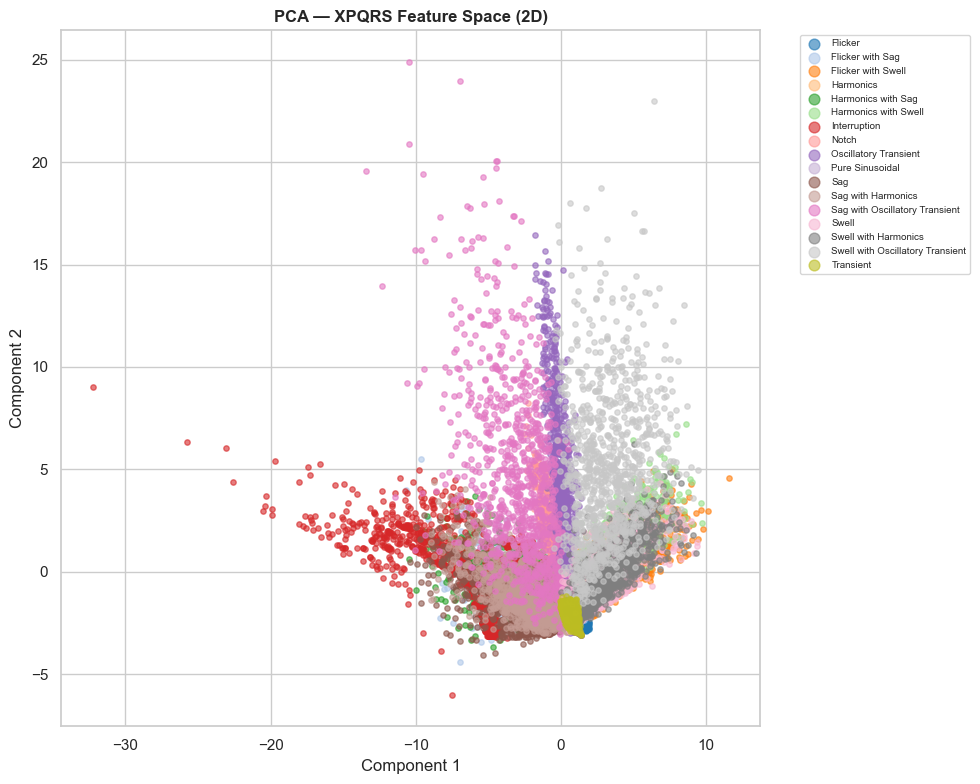

In [12]:
from sklearn.decomposition import PCA
from visualization import plot_pca_2d

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f'Explained variance: PC1={pca.explained_variance_ratio_[0]:.3f}, PC2={pca.explained_variance_ratio_[1]:.3f}')
print(f'Total: {sum(pca.explained_variance_ratio_):.3f}')

fig = plot_pca_2d(X_pca, xpqrs_features_df['label'].values,
                  sorted(xpqrs_features_df['label'].unique()),
                  title='PCA — XPQRS Feature Space (2D)')
fig.savefig('../results/figures/pca_xpqrs.png', dpi=150, bbox_inches='tight')
plt.show()

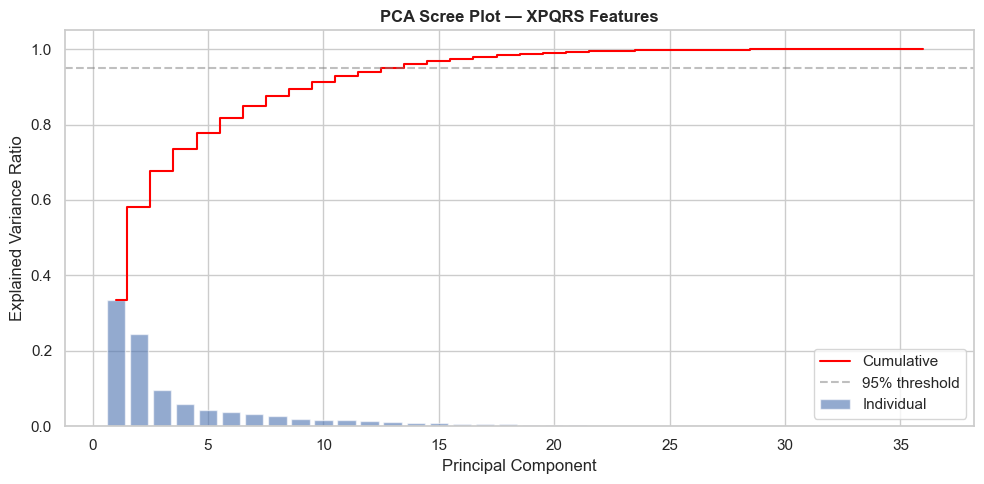

Components needed for 95% variance: 13


In [13]:
# Scree plot
pca_full = PCA().fit(X_scaled)
cumvar = np.cumsum(pca_full.explained_variance_ratio_)

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(1, len(cumvar)+1), pca_full.explained_variance_ratio_, alpha=0.6, label='Individual')
ax.step(range(1, len(cumvar)+1), cumvar, where='mid', color='red', label='Cumulative')
ax.axhline(y=0.95, color='gray', linestyle='--', alpha=0.5, label='95% threshold')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('PCA Scree Plot — XPQRS Features', fontweight='bold')
ax.legend()
plt.tight_layout()
fig.savefig('../results/figures/pca_scree_plot.png', dpi=150, bbox_inches='tight')
plt.show()

n_95 = np.argmax(cumvar >= 0.95) + 1
print(f'Components needed for 95% variance: {n_95}')

## 5. Save Extracted Features

In [14]:
# Save XPQRS features
xpqrs_features_df.to_csv('../results/tables/xpqrs_features.csv', index=False)
print(f'Saved XPQRS features: {xpqrs_features_df.shape}')

# Load and save PQ Disturbances features (already pre-extracted)
pq_df = load_pq_disturbances_as_dataframe(PQ_DIR)
pq_df.to_csv('../results/tables/pq_features.csv', index=False)
print(f'Saved PQ Disturbances features: {pq_df.shape}')

Saved XPQRS features: (17000, 37)
Saved PQ Disturbances features: (798, 73)


---
**Next:** [04_model_training_evaluation.ipynb](04_model_training_evaluation.ipynb) — Train and evaluate ML classifiers.